## Support Vector Machines vs. Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


(150, 5)

(100, 5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1


/Users/takaakiedo/.pyenv/versions/3.12.2/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


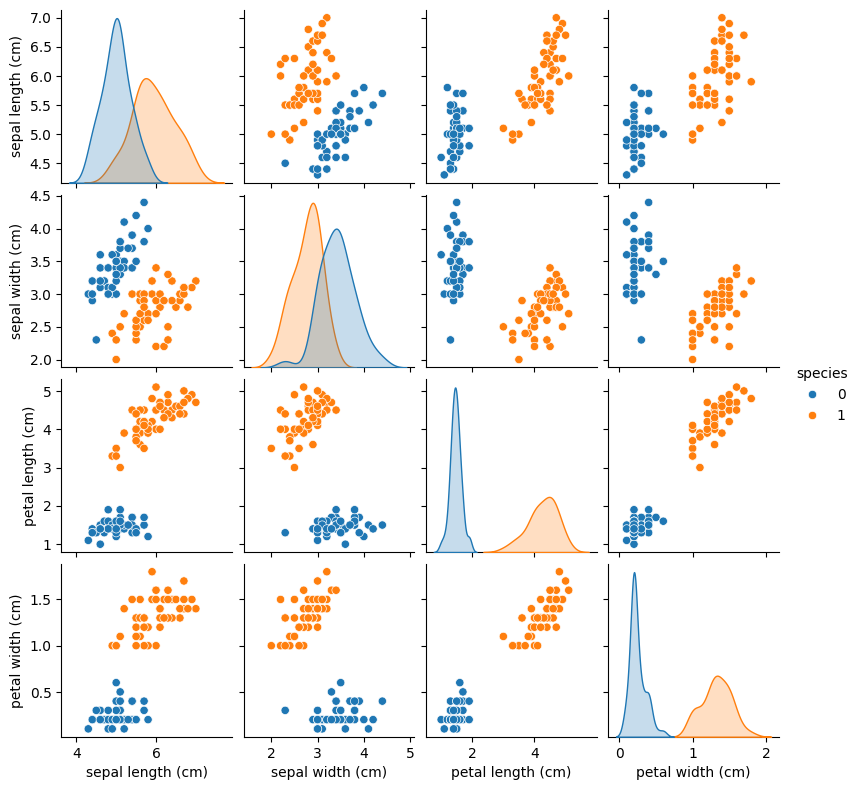

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

df_01 = df.drop(df[(df["species"] == 2)].index)
display(df.head(2), df.shape, df_01.shape)
display(df[df["species"] == 1].head(2))

sns.pairplot(df_01, hue="species", size=2)
plt.show()

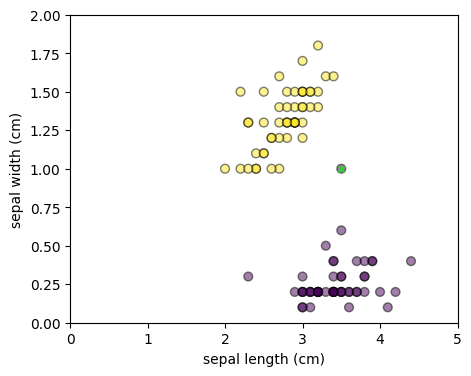

In [3]:
new_data = pd.DataFrame([[7.0, 3.5, 4.7, 1.0, 0]], columns=df.columns)  # <---- Arbitrarily added values
df_01 = pd.concat([df_01, new_data], ignore_index=True)

X = df_01["sepal width (cm)"]
y = df_01["petal width (cm)"]


plt.figure(figsize=(5, 4))
plt.scatter(X, y, c=df_01["species"], cmap="viridis", s=40, alpha=0.5, edgecolors="k")
plt.scatter(new_data["sepal width (cm)"], new_data["petal width (cm)"], color="limegreen", s=20, marker="x")  # <---- Arbitrary value
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.show()

#### Logistic Regression


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

X = df_01[["sepal width (cm)", "petal width (cm)"]]
y = df_01["species"]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


def output_result(X_train, X_test, y_train, y_test, y_pred):
    print("train score:", model.score(X_train, y_train))
    print("test score:", model.score(X_test, y_test))
    print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification report:\n{classification_report(y_test, y_pred)}")
    print(f"Acurracy: {accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")


output_result(X_train, X_test, y_train, y_test, y_pred)

(101, 2) (101,)
train score: 1.0
test score: 1.0
Confusion matrix:
[[11  0]
 [ 0 10]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Acurracy: 1.0
Recall: 1.0
Precision: 1.0


/Users/takaakiedo/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


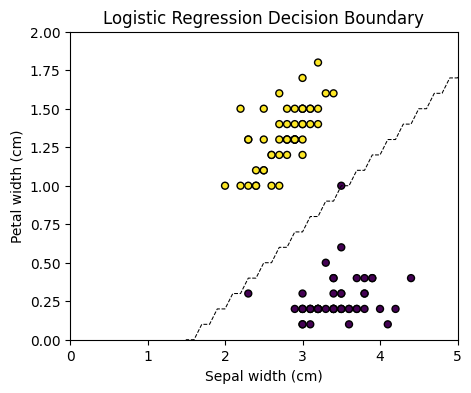

In [5]:
def plot_decision_boundary(X, y, model, title=None):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="viridis", edgecolors="k", s=25, marker="o")
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    levels = np.linspace(Z.min(), Z.max(), 2)
    # plt.contourf(xx, yy, Z, alpha=0.2, cmap="viridis")
    plt.contour(xx, yy, Z, levels=levels, colors="k", linestyles="--", linewidths=0.75)
    plt.title(title)


plt.figure(figsize=(5, 4))
plot_decision_boundary(X, y, model, title="Logistic Regression Decision Boundary")
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.xlabel("Sepal width (cm)")
plt.ylabel("Petal width (cm)")

plt.show()

#### Support Vector Machines


In [6]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

output_result(X_train, X_test, y_train, y_test, y_pred)

train score: 1.0
test score: 1.0
Confusion matrix:
[[11  0]
 [ 0 10]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Acurracy: 1.0
Recall: 1.0
Precision: 1.0


/Users/takaakiedo/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Petal width (cm)')

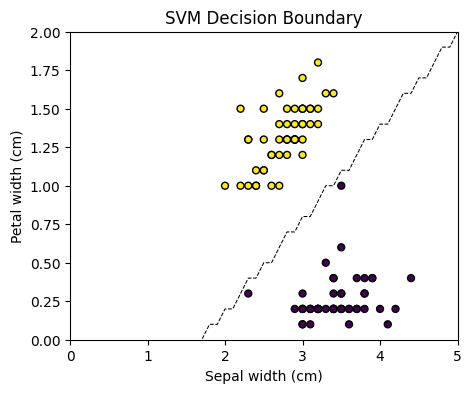

In [7]:
plt.figure(figsize=(5, 4))
plot_decision_boundary(X, y, model, title="SVM Decision Boundary")
plt.xlim(0, 5)
plt.ylim(0, 2)
plt.xlabel("Sepal width (cm)")
plt.ylabel("Petal width (cm)")